# Hierarchical Clustering - Agglomerative

# Hands On

In [28]:
import numpy as np 
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs
%matplotlib inline

# Generating Random Data 

In [2]:
x1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)
print(x1[0:10], "\n\n" ,y1[0:10])

[[11.14064256  5.10888034]
 [-3.16188533 -2.35517091]
 [ 1.98896926 -0.63956766]
 [ 3.2643774   3.18069553]
 [ 1.66750842  0.25158866]
 [ 7.94602596  6.09705997]
 [ 2.32327531  1.62167952]
 [11.22343461  4.37307969]
 [ 8.88350715  5.42846059]
 [ 4.43206848  3.83091772]] 

 [3 1 2 0 2 3 2 3 3 0]


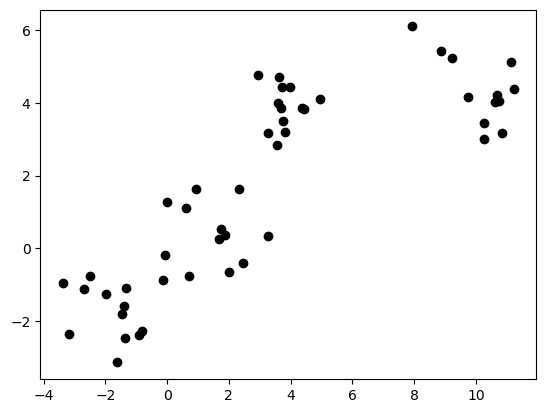

In [3]:
plt.scatter(x1[:,0], x1[:,1], marker="o", color="black")
plt.show()

# Agglomerative Clustering

In [4]:
agglom = AgglomerativeClustering(n_clusters=4, linkage="average")
agglom

AgglomerativeClustering(linkage='average', n_clusters=4)

In [5]:
agglom.fit(x1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [6]:
print(x1.shape)
print(agglom.labels_)

(50, 2)
[0 3 1 2 1 0 1 0 0 2 1 0 3 2 0 2 0 0 3 3 3 3 3 0 2 3 1 1 1 1 2 2 2 0 0 0 2
 1 1 2 3 3 3 1 3 1 2 2 2 1]


Create a minimum and maximum range of X1.

In [7]:
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)

print(x_min, x_max)

[-3.37794676 -3.13670231] [11.22343461  6.09705997]


Get the average distance for X1. <br/>
note: basically, we map the numbers between 0 and one (we normilize them)

In [8]:
x1 = (x1 - x_min) / (x_max - x_min)

x1[0:10]

array([[0.99432985, 0.89298191],
       [0.01479733, 0.08463846],
       [0.36756221, 0.27043523],
       [0.45491067, 0.68416293],
       [0.34554643, 0.36694587],
       [0.77554119, 1.        ],
       [0.39045772, 0.51532427],
       [1.        , 0.81329601],
       [0.83974616, 0.92759188],
       [0.53488194, 0.75458083]])

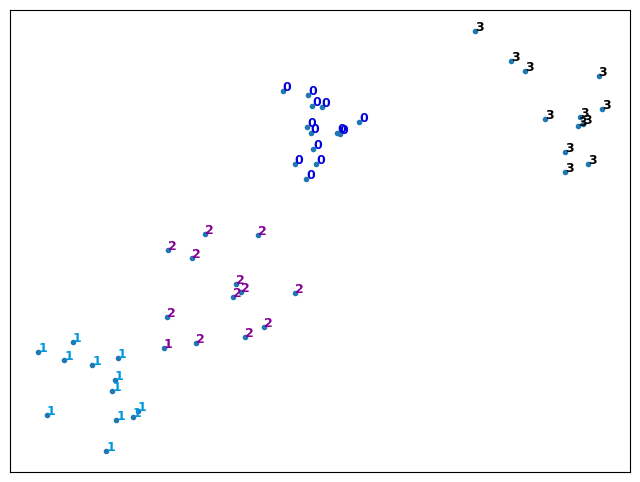

In [9]:
plt.figure(figsize=(8,6))

for i in range(x1.shape[0]):
    plt.text(
        x1[i,0],
        x1[i,1],
        str(y1[i]),
        color=plt.cm.nipy_spectral(agglom.labels_[i]/10.0),
        fontdict={"weight": "bold", "size":9}
    )

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(x1[:, 0], x1[:, 1], marker='.')

# Display the plot
plt.show()

# Dendrogram associated for the agglomerative hierarchical slustering 

In [20]:
x1[0:1]

array([[0.99432985, 0.89298191]])

calculating the distance of each point to n-1 other point

In [24]:
dist_matrix = distance_matrix(x1, x1)
print(dist_matrix[0])
print("\n")
print(dist_matrix[27])
print("\n")
print(dist_matrix[-1])

[0.         1.27000122 0.88340366 0.57842754 0.83524477 0.24355974
 0.71224071 0.07988738 0.15841076 0.47984084 0.84144624 0.10226413
 1.18431893 0.43891265 0.19019994 0.5310449  0.1177483  0.12394624
 1.16398122 1.12809894 1.15771247 1.13223114 1.12361779 0.14052533
 0.48258187 1.14310021 0.84329747 0.81643997 0.79341402 0.8113515
 0.57336961 0.51336437 0.5286028  0.23619886 0.13079811 0.21030742
 0.49681046 1.00707773 0.95636917 0.5424795  1.14307113 1.08559039
 1.19133959 0.86905669 1.24894863 0.74576043 0.56193952 0.51721686
 0.53503232 0.95758185]


[0.81643997 0.45366382 0.1091609  0.31936238 0.01881725 0.74709529
 0.13943806 0.77349125 0.72871521 0.41413019 0.11705358 0.73236255
 0.3768178  0.45465915 0.66433858 0.40990994 0.7266621  0.71686715
 0.3526813  0.32173144 0.3537037  0.31677696 0.30782879 0.67774105
 0.41582874 0.32835506 0.09357281 0.         0.15180158 0.02021153
 0.2927966  0.45922099 0.39785325 0.64167399 0.72893029 0.68653397
 0.46353676 0.19126925 0.1462246  0.3

- Using the linkage class from hierarchy, pass in the parameters: <br/>
    - the distance matrix <br/>
    - "complete" for complete linkage 

In [34]:
z = hierarchy.linkage(squareform(dist_matrix), "complete")
z[0:5]

array([[9.00000000e+00, 2.40000000e+01, 5.39904303e-03, 2.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 9.95168708e-03, 2.00000000e+00],
       [2.00000000e+01, 4.00000000e+01, 1.49746894e-02, 2.00000000e+00],
       [1.50000000e+01, 3.20000000e+01, 1.58036129e-02, 2.00000000e+00],
       [3.10000000e+01, 3.60000000e+01, 1.68289586e-02, 2.00000000e+00]])

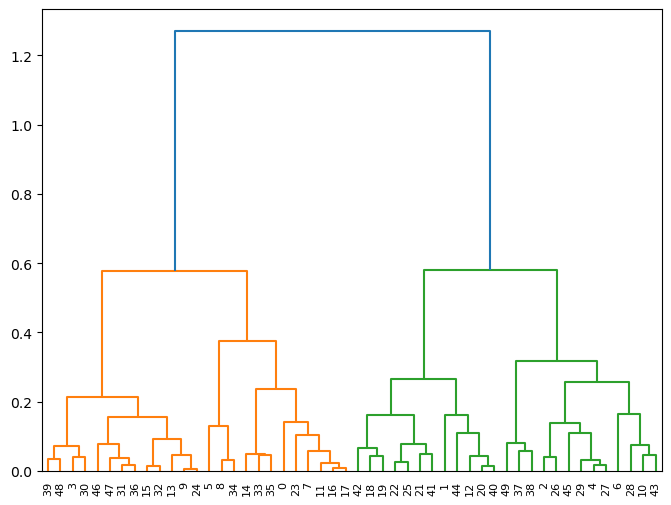

In [42]:
plt.figure(figsize=(8,6))
dendro = hierarchy.dendrogram(z)
plt.show()